In [1]:
# Agglomerative clustering algorithms:
# 1. Declare each point its own cluster.
# 2. Merge 2 most similar clusters until stopping criterion is satisfied.

# Stopping criterion in sklearn - number of clusters.
# Similar clusters are merged until the specified number of clusters are left.

# Linkage measure between 2 clusters in sklearn:
# 1. ward (default) - pick 2 clusters to merge such that variance within all clusters increases the least
# 2. average - merge 2 clusters that have smallest average distance between all their points
# 3. complete (maximum linkage) - merge 2 clusters that have smallest maximum distance between all points

# Ward leads to equally-sized clusters
# Use average or complete if clusters have dissimilar number of members

# Agglomerative clustering can't make predictions for new data points
# Agglomerative clustering fails at separating complex shapes

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons
import mglearn
import matplotlib.pyplot as plt

# Dendrogram function and ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

In [4]:
X, y = make_blobs(random_state=1)

Text(0, 0.5, 'Feature 1')

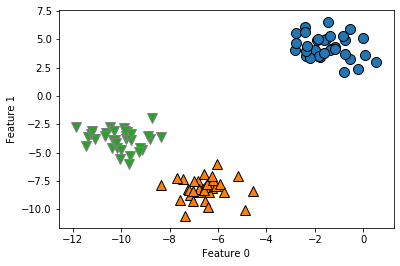

In [5]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X) # build the model and get cluster labels for training set

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

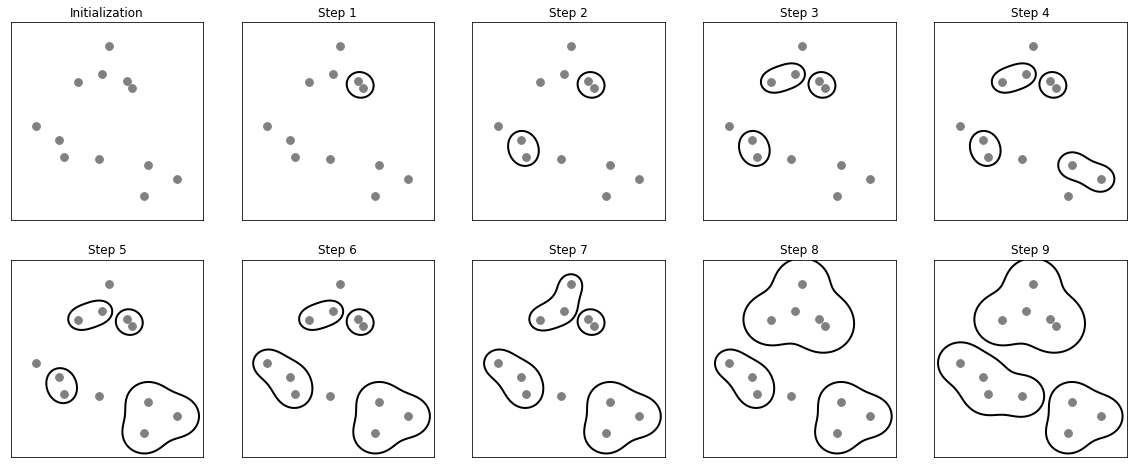

In [6]:
mglearn.plots.plot_agglomerative_algorithm()

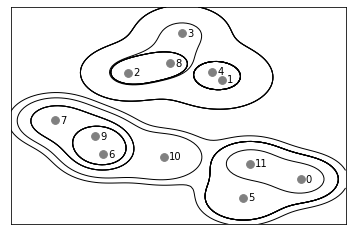

In [7]:
# Hierarchical clustering (dendrogram) - clustering proceeds iteratively
# Each intermediate step provides clustering of the data (with different number of clusters)

mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

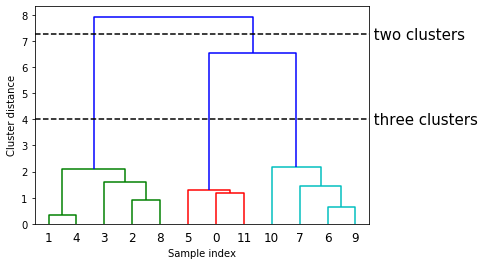

In [8]:
X, y = make_blobs(random_state=0, n_samples=12)

# Compute linkage array with encoded hierarchical cluster similarities
# Array contains distances bridged when performing agglomerative clustering
linkage_array = ward(X)

# Plot the dendrogram for linkage array that contains distances between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound() # lower and upper x-axis bounds

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

# y-axis specifies:
# 1. when 2 clusters are merged
# 2. how far apart the merged clusters are (by length of the branch) 

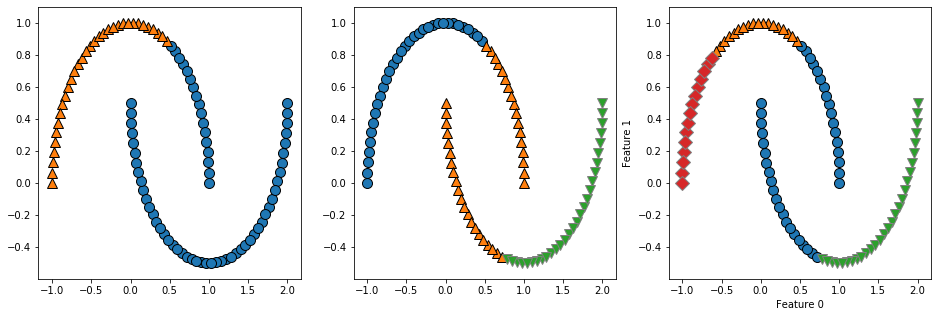

In [9]:
# Failing with complex shapes
X, y = make_moons(random_state=1)
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
for i, ax in zip(range(2, 5), [ax1, ax2, ax3]):
    agg = AgglomerativeClustering(n_clusters=i)
    assignment = agg.fit_predict(X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment, ax=ax)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')